## Import libraries

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

## First analysis

In [23]:
train_df = pd.read_csv('data/train.csv',parse_dates=['date'])
test_df = pd.read_csv('data/test.csv',parse_dates=['date'])

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 4 columns):
date     913000 non-null datetime64[ns]
store    913000 non-null int64
item     913000 non-null int64
sales    913000 non-null int64
dtypes: datetime64[ns](1), int64(3)
memory usage: 27.9 MB


In [25]:
# Look at the number of stores
print(train_df['store'].value_counts())

10    91300
9     91300
8     91300
7     91300
6     91300
5     91300
4     91300
3     91300
2     91300
1     91300
Name: store, dtype: int64


In [26]:
train_df_items = train_df.pivot_table(values='sales',index=['store','date'],columns='item').reset_index().set_index('date')
train_df_items.columns = ["store"] + ["item_"+str(name_col) for name_col in train_df_items.columns.tolist()[1:]]

In [27]:
train_df = train_df.pivot_table(values='sales',index=['item','date'],columns='store').reset_index().set_index('date')
train_df.columns = ["item"] + ["store_"+str(name_col) for name_col in train_df.columns.tolist()[1:]]

In [28]:
train_df.head()

,item,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10
date,,,,,,,,,,,
2013-01-01,1,13,12,19,10,11,20,7,16,11,14
2013-01-02,1,11,16,8,12,9,6,4,10,9,14
2013-01-03,1,14,16,10,8,12,11,8,12,20,16
2013-01-04,1,13,20,15,15,8,7,7,21,22,17
2013-01-05,1,10,16,22,19,13,12,8,15,22,12


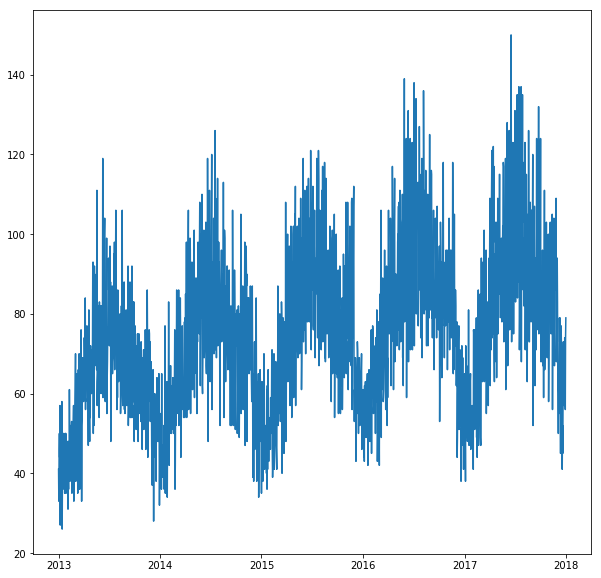

In [29]:
plt.figure(figsize=(10,10))
plt.plot(train_df[train_df['item']==2].index,train_df['store_2'][train_df['item']==2])
plt.show()

In [30]:
train_df['week'] = train_df.index.to_datetime().week
train_df['weekday'] = train_df.index.to_datetime().weekday

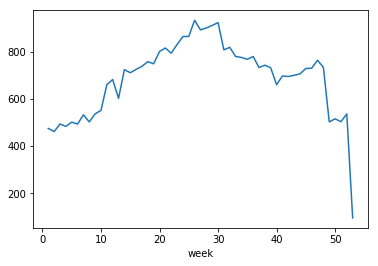

In [31]:
train_df[train_df['item']==1].groupby('week').sum()['store_1'].plot()

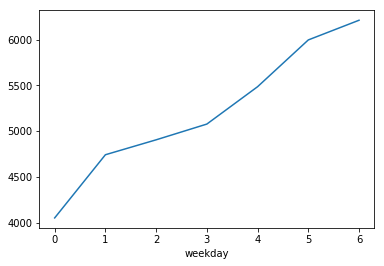

In [32]:
train_df[train_df['item']==1].groupby('weekday').sum()['store_1'].plot()

In [33]:
train_df[train_df['item']==10].groupby('weekday').sum()

,item,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,week
weekday,,,,,,,,,,,,
0,2600,13667,19291,17306,15922,11322,11382,10504,18688,15884,17038,6942
1,2610,15910,22512,20057,18421,13296,13277,12498,21545,18561,19863,6943
2,2610,16008,23046,20175,18704,13442,13385,12397,21740,18586,19889,6943
3,2610,17173,24374,21411,19894,14415,14473,13273,23156,19783,21132,6943
4,2610,18339,25996,23097,21125,15467,15312,14035,24742,21120,22838,6943
5,2610,19264,27556,24447,22691,16282,16369,14874,26344,22766,24114,6943
6,2610,20802,29047,25773,23932,17137,17264,15831,27793,24094,25282,6943


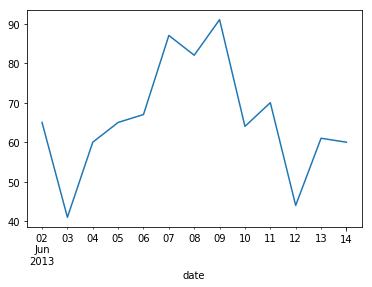

In [34]:
train_df[(train_df['item']==10) & (train_df.index > '2013-06-01') & (train_df.index < '2013-06-15')]['store_1'].plot()

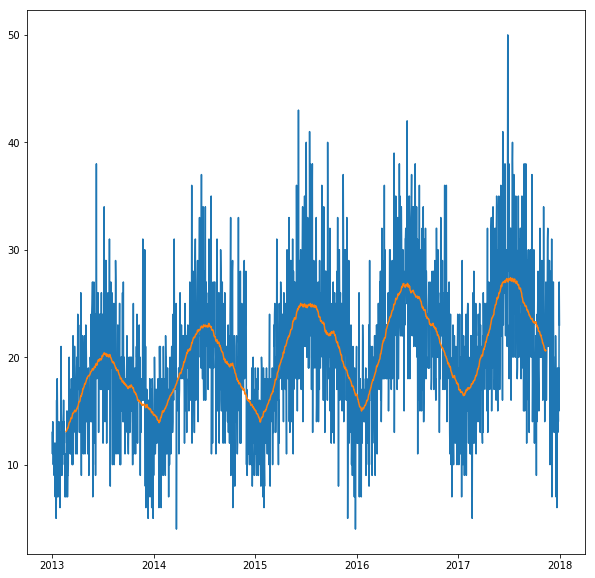

In [35]:
plt.figure(figsize=(10,10))
df_mvavg = train_df[train_df['item']==1].rolling(100,center=True).mean()
plt.plot(train_df[train_df['item']==1].index,train_df['store_1'][train_df['item']==1])
plt.plot(df_mvavg.index,df_mvavg['store_1'])
plt.show()

In [36]:
train_df.pct_change().corr()

,item,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,week,weekday
item,1.000000,-0.008728,-0.012772,-0.003417,-0.013125,-0.012514,-0.009212,-0.009711,-0.011800,-0.009504,-0.012249,-0.137879,-0.021784
store_1,-0.008728,1.000000,0.291899,0.282539,0.277990,0.237062,0.237354,0.215672,0.291263,0.274037,0.278159,-0.132633,0.426213
store_2,-0.012772,0.291899,1.000000,0.325141,0.312206,0.274769,0.271843,0.262927,0.337123,0.317452,0.321608,-0.153462,0.485068
store_3,-0.003417,0.282539,0.325141,1.000000,0.298737,0.267628,0.262656,0.252917,0.324832,0.313633,0.311981,-0.143969,0.466012
store_4,-0.013125,0.277990,0.312206,0.298737,1.000000,0.255600,0.259694,0.238762,0.314556,0.298621,0.304146,-0.139429,0.451751
store_5,-0.012514,0.237062,0.274769,0.267628,0.255600,1.000000,0.222002,0.214418,0.271806,0.263052,0.258268,-0.123754,0.388210
store_6,-0.009212,0.237354,0.271843,0.262656,0.259694,0.222002,1.000000,0.209872,0.274187,0.250569,0.264967,-0.122076,0.389324
store_7,-0.009711,0.215672,0.262927,0.252917,0.238762,0.214418,0.209872,1.000000,0.255433,0.244591,0.243647,-0.116177,0.368477
store_8,-0.011800,0.291263,0.337123,0.324832,0.314556,0.271806,0.274187,0.255433,1.000000,0.316682,0.311591,-0.148436,0.472065
store_9,-0.009504,0.274037,0.317452,0.313633,0.298621,0.263052,0.250569,0.244591,0.316682,1.000000,0.308279,-0.139313,0.447863


In [37]:
(train_df[train_df['item']==2]['store_1'].pct_change()).corr(train_df[train_df['item']==5]['store_1'].pct_change())

0.2620985764166811

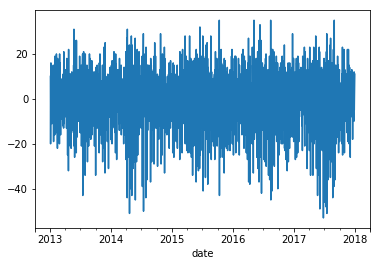

In [38]:
train_df[train_df['item']==2]['store_1'].diff().plot()

In [39]:
from statsmodels.tsa.stattools import adfuller
print(adfuller(train_df[train_df['item']==3]['store_1']))

(-3.031142971657204, 0.03208662725775648, 25, 1800, {'1%': -3.4339881389288407, '5%': -2.863147035877915, '10%': -2.567625533641975}, 12035.385782019672)


In [40]:
train_df_items.head()

,store,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
date,,,,,,,,,,,,,,,,,,,,,
2013-01-01,1,13,33,15,10,11,31,25,33,18,...,6,21,22,20,37,30,17,21,18,30
2013-01-02,1,11,43,30,11,6,36,23,37,23,...,15,24,27,15,40,30,15,26,10,32
2013-01-03,1,14,23,14,8,8,18,34,38,25,...,5,14,19,11,42,30,5,25,17,25
2013-01-04,1,13,18,10,19,9,19,36,54,22,...,9,22,29,22,49,37,13,26,22,32
2013-01-05,1,10,34,23,12,8,31,38,51,29,...,13,18,34,19,52,28,12,28,15,35


In [41]:
train_df_items[train_df_items['store']==1].pct_change().corr()

,store,item_1,item_2,item_3,item_4,item_5,item_6,item_7,item_8,item_9,...,item_41,item_42,item_43,item_44,item_45,item_46,item_47,item_48,item_49,item_50
store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
item_1,NaN,1.000000,0.229363,0.179673,0.146560,0.153365,0.198161,0.233595,0.230095,0.233733,...,0.177128,0.164679,0.234664,0.207745,0.239836,0.220656,0.142432,0.237509,0.205161,0.207727
item_2,NaN,0.229363,1.000000,0.269378,0.208933,0.262099,0.366857,0.288179,0.348230,0.285215,...,0.231854,0.312812,0.315911,0.261235,0.382920,0.308396,0.201765,0.355217,0.281078,0.320301
item_3,NaN,0.179673,0.269378,1.000000,0.212896,0.142938,0.283549,0.266285,0.314617,0.239041,...,0.125020,0.287184,0.255192,0.234723,0.284667,0.252330,0.182492,0.257317,0.183240,0.300998
item_4,NaN,0.146560,0.208933,0.212896,1.000000,0.121914,0.255307,0.234751,0.257708,0.295357,...,0.171017,0.185637,0.247073,0.160512,0.252044,0.292499,0.143930,0.216452,0.175691,0.243771
item_5,NaN,0.153365,0.262099,0.142938,0.121914,1.000000,0.204157,0.171044,0.219282,0.174229,...,0.128373,0.163008,0.199835,0.121474,0.220700,0.197029,0.123991,0.193054,0.196568,0.228441
item_6,NaN,0.198161,0.366857,0.283549,0.255307,0.204157,1.000000,0.323887,0.347514,0.338094,...,0.232914,0.293659,0.312436,0.259726,0.385473,0.362055,0.255332,0.335078,0.237530,0.337465
item_7,NaN,0.233595,0.288179,0.266285,0.234751,0.171044,0.323887,1.000000,0.394548,0.339043,...,0.237905,0.290589,0.277287,0.214654,0.377886,0.346615,0.220835,0.262325,0.247267,0.364490
item_8,NaN,0.230095,0.348230,0.314617,0.257708,0.219282,0.347514,0.394548,1.000000,0.370041,...,0.244649,0.273310,0.360386,0.282565,0.432585,0.376486,0.256171,0.336387,0.298380,0.368030
item_9,NaN,0.233733,0.285215,0.239041,0.295357,0.174229,0.338094,0.339043,0.370041,1.000000,...,0.225710,0.246244,0.284977,0.211136,0.356927,0.320790,0.234083,0.305199,0.246417,0.296652


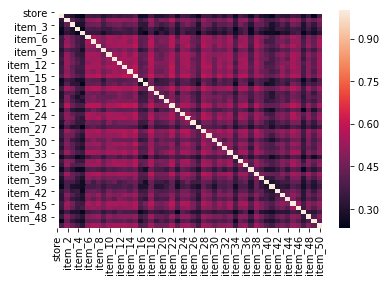

In [45]:
import seaborn as sns
sns.heatmap(train_df_items[train_df_items['store']==3].diff().corr())

### First model : 10-10

#### Reshaping DataFrame

In [46]:
train_df.head()

,item,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,week,weekday
date,,,,,,,,,,,,,
2013-01-01,1,13,12,19,10,11,20,7,16,11,14,1,1
2013-01-02,1,11,16,8,12,9,6,4,10,9,14,1,2
2013-01-03,1,14,16,10,8,12,11,8,12,20,16,1,3
2013-01-04,1,13,20,15,15,8,7,7,21,22,17,1,4
2013-01-05,1,10,16,22,19,13,12,8,15,22,12,1,5


In [48]:
train_df_item1 = train_df[train_df['item']==1]
train_df_item1 = train_df_item1.drop('item',axis=1)
train_df_item1.head()

,store_1,store_2,store_3,store_4,store_5,store_6,store_7,store_8,store_9,store_10,week,weekday
date,,,,,,,,,,,,
2013-01-01,13,12,19,10,11,20,7,16,11,14,1,1
2013-01-02,11,16,8,12,9,6,4,10,9,14,1,2
2013-01-03,14,16,10,8,12,11,8,12,20,16,1,3
2013-01-04,13,20,15,15,8,7,7,21,22,17,1,4
2013-01-05,10,16,22,19,13,12,8,15,22,12,1,5


In [50]:
nb_days = 10
for i in range(nb_days):
    

            store_1  store_2  store_3  store_4  store_5  store_6  store_7  \
date                                                                        
2013-01-01      NaN      NaN      NaN      NaN      NaN      NaN      NaN   
2013-01-02     13.0     12.0     19.0     10.0     11.0     20.0      7.0   
2013-01-03     11.0     16.0      8.0     12.0      9.0      6.0      4.0   
2013-01-04     14.0     16.0     10.0      8.0     12.0     11.0      8.0   
2013-01-05     13.0     20.0     15.0     15.0      8.0      7.0      7.0   

            store_8  store_9  store_10  week  weekday  
date                                                   
2013-01-01      NaN      NaN       NaN   NaN      NaN  
2013-01-02     16.0     11.0      14.0   1.0      1.0  
2013-01-03     10.0      9.0      14.0   1.0      2.0  
2013-01-04     12.0     20.0      16.0   1.0      3.0  
2013-01-05     21.0     22.0      17.0   1.0      4.0  
